In [ ]:
## 데이터시각화 중간고사 레포트
## 2019315036 허다희

In [ ]:
!pip install pywaffle

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from pywaffle import Waffle
import datetime

plt.rcParams['figure.dpi'] = 150

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# IndianSummers 데이터 불러오기

df = pd.read_csv("/content/Indian_Summers_Over_the_years.csv")
df.head()

,City,Date,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,windspeed,winddir,sealevelpressure,cloudcover,visibility,sunrise,sunset,moonphase,conditions,description
0,New Delhi,2021-04-01,34.0,19.0,27.1,31.6,19.0,26.1,3.1,22.60,22.8,272.9,1002.8,NaN,3.1,2021-04-01 6:11,2021-04-01 18:39,0.60,Clear,Clear conditions throughout the day.
1,New Delhi,2021-04-02,33.9,16.0,25.8,31.8,16.0,24.9,4.5,27.62,12.4,275.0,1006.2,NaN,3.5,2021-04-02 6:10,2021-04-02 18:39,0.65,Clear,Clear conditions throughout the day.
2,New Delhi,2021-04-03,34.8,14.6,26.0,32.2,14.6,25.1,1.3,23.18,16.5,127.5,1008.8,1.4,3.5,2021-04-03 6:08,2021-04-03 18:40,0.70,Clear,Clear conditions throughout the day.
3,New Delhi,2021-04-04,36.8,16.9,27.1,34.2,16.9,26.0,4.8,28.00,18.3,157.6,1009.5,2.6,3.2,2021-04-04 6:07,2021-04-04 18:40,0.76,Clear,Clear conditions throughout the day.
4,New Delhi,2021-04-05,38.8,21.0,29.9,37.1,21.0,28.9,8.1,28.85,13.5,100.4,1007.8,38.4,3.1,2021-04-05 6:06,2021-04-05 18:41,0.81,Partially cloudy,Partly cloudy throughout the day.


<Axes: xlabel='City'>

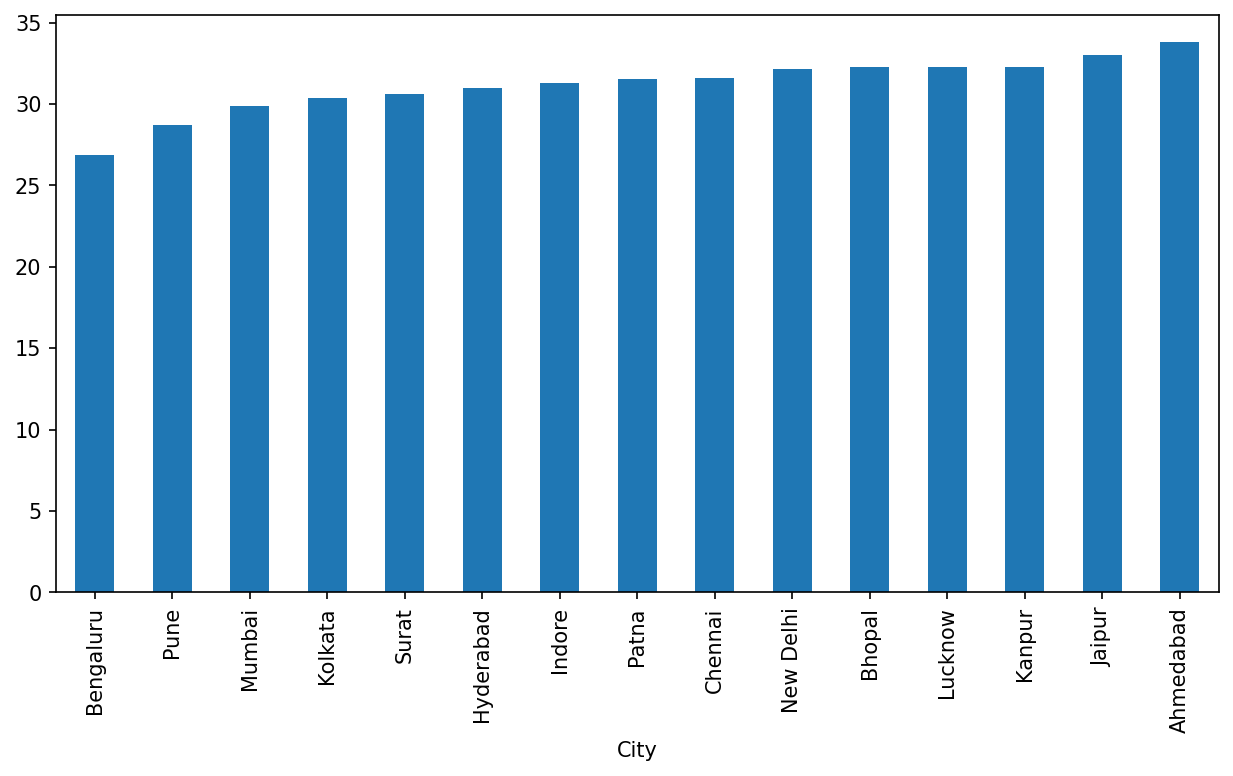

In [ ]:
# 차트 그리기
fig = plt.figure(figsize=(20, 12)) # 차트 생성 및 사이즈 설정
ax = fig.add_subplot(1,1,1) # subplot 생성

ax.plot(CLOU['Close'], label='CLOU', color='b') # CLOU 종가 불러오기
ax.plot(SKYY['Close'].iloc[1689:], label='SKYY', color='r') # SKYY 종가 불러오기

ax.set_title('CLOU & SKYY Close price', fontsize=20) # 타이틀 설정
ax.set_ylabel('price', fontsize=14) # x축 설정
ax.set_xlabel('Date', fontsize=14) # y축 설정

ax.legend(fontsize=12, loc='best') # 범례 설정 best로 해놓으면 가장 적절한 위치에 알아서 범례가 놓이게 됩니디

plt.show()


---

**x축 : 도시  /  y축 : 평균 기온**

---


**인도의 평균 기온이 가장 높은 도시는 Ahmedabad이고, 평균 기온이 가장 낮은 도시는 Bengaluru이다**

---


<Axes: xlabel='feelslike'>

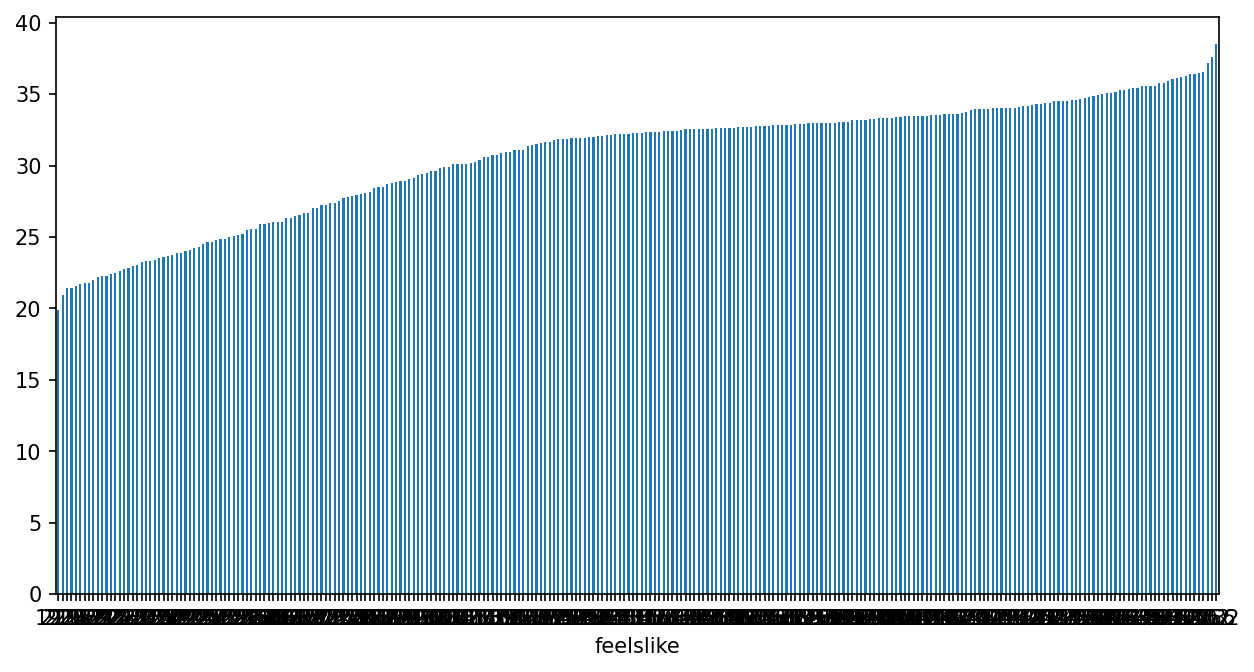

In [ ]:
temp_bar = df.groupby('feelslike')['temp'].mean().sort_values()

temp_bar.head()

temp_bar.plot.bar(x='feelslike', y='temp', rot=0, figsize=(10,5))


---

**x축 : 평균 기온  /  y축 : 기분**

---


**인도 사람들은 평균 기온이 상승할수록 체감 온도가 상승하는 경향이 있다**

---


<Axes: xlabel='humidity'>

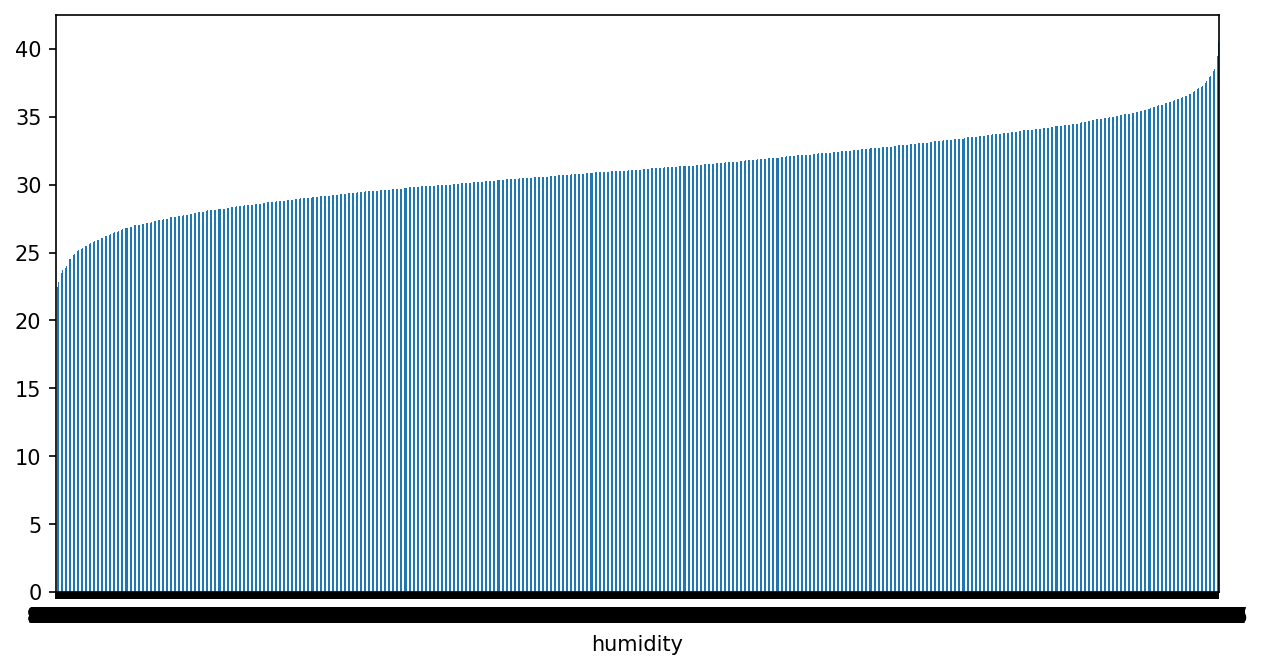

In [ ]:
temp_bar = df.groupby('humidity')['temp'].mean().sort_values()

temp_bar.head()

temp_bar.plot.bar(x='humidity', y='humidity', rot=0, figsize=(10,5))


---

**x축 : 평균 습도  /  y축 : 평균 기온**

---


**평균 습도가 상승할수록 평균 기온이 상승한다**

---


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
year = df.groupby('year').mean().reset_index()
df['month'] = df['Date'].dt.month
month = df.groupby('month').mean().reset_index()

df = df[['City','year','month','tempmax', 'tempmin']]

df.head()

<ipython-input-12-121897a23b85>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year = df.groupby('year').mean().reset_index()
<ipython-input-12-121897a23b85>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month = df.groupby('month').mean().reset_index()


,City,year,month,tempmax,tempmin
0,New Delhi,2021,4,34.0,19.0
1,New Delhi,2021,4,33.9,16.0
2,New Delhi,2021,4,34.8,14.6
3,New Delhi,2021,4,36.8,16.9
4,New Delhi,2021,4,38.8,21.0


In [ ]:
tempmax_fig = px.treemap(df,
                 path=['year', 'month', 'City'],
                 values='tempmax',
                 color='tempmax',
                 color_continuous_scale='reds')

tempmax_fig.show()


---

**연도별 + 월별 + 지역별 최고기온을 한 눈에 볼 수 있는 트리맵 차트**

---



In [ ]:
tempmin_fig = px.treemap(df,
                 path=['year', 'month', 'City'],
                 values='tempmin',
                 color='tempmin',
                 color_continuous_scale='ice')

tempmin_fig.show()


---

**연도별 + 월별 + 지역별 최고기온을 한 눈에 볼 수 있는 트리맵 차트**

---
